In [1]:
import sys

sys.path.append('../scripts')
import data_helper

In [8]:
data = data_helper.load_data(only_diagnosis_ids=True)
# print first 10 items of dictionary
print({k: data[k] for k in list(data)[:10]})

{'JS00001': array([164889003,  59118001, 164934002]), 'JS00002': array([426177001, 164934002]), 'JS00004': array([426177001]), 'JS00005': array([164890007, 429622005, 428750005]), 'JS00006': array([426177001]), 'JS00007': array([164889003, 164934002]), 'JS00008': array([426783006]), 'JS00009': array([426177001]), 'JS00010': array([426177001]), 'JS00011': array([426177001,  55827005])}


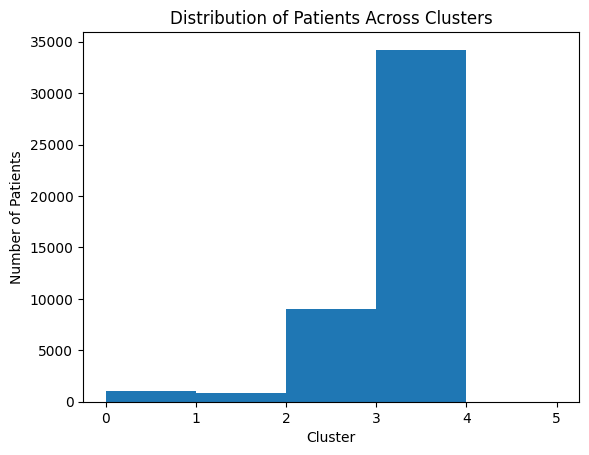

In [23]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming [`data`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22c%3A%5C%5CUsers%5C%5Cfelix%5C%5COneDrive%5C%5CStudium%5C%5CMaster%20MDS%5C%5C1%20Semester%5C%5CDSA%5C%5Ccode%5C%5CDSA_SS24%5C%5Cnotebooks%5C%5Ccluster_diagnosis.ipynb%22%2C%22_sep%22%3A1%2C%22path%22%3A%22%2Fc%3A%2FUsers%2Ffelix%2FOneDrive%2FStudium%2FMaster%20MDS%2F1%20Semester%2FDSA%2Fcode%2FDSA_SS24%2Fnotebooks%2Fcluster_diagnosis.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22W2sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A0%7D%5D "c:\Users\felix\OneDrive\Studium\Master MDS\1 Semester\DSA\code\DSA_SS24\notebooks\cluster_diagnosis.ipynb") is your dictionary

# Step 1 & 2: Collect all unique diagnosis IDs
all_diagnosis_ids = set(diagnosis_id for patient_diagnoses in data.values() for diagnosis_id in patient_diagnoses)

# Create a mapping of diagnosis IDs to column indices
diagnosis_id_to_index = {diagnosis_id: index for index, diagnosis_id in enumerate(all_diagnosis_ids)}

# Step 4: Create the binary matrix
patient_diagnosis_matrix = np.zeros((len(data), len(all_diagnosis_ids)))

for patient_index, (patient, diagnoses) in enumerate(data.items()):
    for diagnosis in diagnoses:
        diagnosis_index = diagnosis_id_to_index[diagnosis]
        patient_diagnosis_matrix[patient_index, diagnosis_index] = 1

# Step 3: Preprocess the data (optional, depending on the algorithm)
scaler = StandardScaler()
patient_diagnosis_matrix_scaled = scaler.fit_transform(patient_diagnosis_matrix)

# Step 6: Cluster the data
# Adjust `n_clusters` based on domain knowledge or experimentation
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(patient_diagnosis_matrix_scaled)

# Step 7: Analyze the clusters
# This step is domain-specific and might involve looking at the characteristics of each cluster,
# such as the most common diagnosis IDs in each cluster.
# plot the clusters

import matplotlib.pyplot as plt

plt.hist(clusters, bins=range(6))
plt.xlabel('Cluster')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients Across Clusters')
plt.show()

In [24]:
# Create a dictionary to hold diagnosis IDs for each cluster
cluster_diagnosis = {i: [] for i in range(kmeans.n_clusters)}

# Iterate over each patient and their assigned cluster
for patient_index, cluster in enumerate(clusters):
    # Retrieve the original diagnosis IDs for this patient
    patient_diagnoses = data[list(data.keys())[patient_index]]
    # Append these diagnosis IDs to the corresponding cluster entry in the dictionary
    cluster_diagnosis[cluster].extend(patient_diagnoses)

# Deduplicate diagnosis IDs in each cluster and print them
for cluster, diagnoses in cluster_diagnosis.items():
    unique_diagnoses = set(diagnoses)
    print(f"Cluster {cluster}: {unique_diagnoses}")

Cluster 0: {164912004, 89792004, 425856008, 251205003, 164917005, 365413008, 17338001, 55930002, 251146004, 164890007, 81898007, 251199005, 426783006, 39732003, 427172004, 106068003, 164873001, 164889003, 54329005, 426761007, 713422000, 59118001, 251198002, 164942001, 61721007, 428750005, 445118002, 733534002, 164937009, 57054005, 426995002, 164931005, 55827005, 713427006, 13640000, 67751000119106, 426648003, 426664006, 29320008, 164909002, 27885002, 61277005, 233917008, 251170000, 195042002, 10370003, 713426002, 164930006, 111975006, 251223006, 427084000, 698252002, 270492004, 251164006, 426177001, 164865005, 47665007, 427393009, 164934002, 74390002, 284470004, 429622005, 6374002, 59931005}
Cluster 1: {89792004, 164912004, 425856008, 251205003, 164917005, 365413008, 55930002, 251146004, 164890007, 49578007, 426783006, 233892002, 39732003, 427172004, 106068003, 164873001, 54329005, 5609005, 61721007, 713422000, 426761007, 445118002, 733534002, 233897008, 57054005, 426627000, 426995002,

In [25]:
# Initialize a dictionary to count patients in each cluster
cluster_patient_count = {i: 0 for i in range(kmeans.n_clusters)}

# Iterate over the assigned clusters and increment the count for each cluster
for cluster in clusters:
    cluster_patient_count[cluster] += 1

# Print the number of patients in each cluster
for cluster, count in cluster_patient_count.items():
    print(f"Cluster {cluster}: {count} patients")

Cluster 0: 1035 patients
Cluster 1: 880 patients
Cluster 2: 9012 patients
Cluster 3: 34223 patients


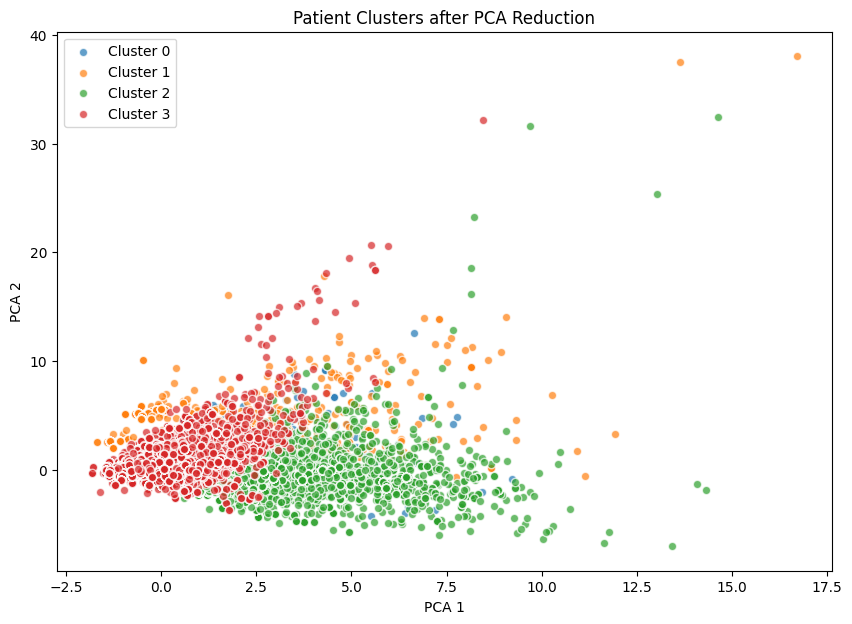

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(patient_diagnosis_matrix_scaled)

# Step 2: Plot the results
plt.figure(figsize=(10, 7))
# Scatter plot for each cluster
for i in range(kmeans.n_clusters):
    # Select only data points that belong to the current cluster
    cluster_data = reduced_data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i}', alpha=0.7, edgecolors='w')

# Add legend and labels for clarity
plt.title('Patient Clusters after PCA Reduction')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()